# Finite Element Analysis [ME335A]

## Problem 1

In [ ]:
import math
import numpy as np
import sympy as sp
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

plt.rcParams.update({
    'font.size': 18,          # Base font size for text
    'axes.titlesize': 20,     # Font size for axes titles
    'axes.labelsize': 20,     # Font size for x and y labels
    'xtick.labelsize': 16,    # Font size for x tick labels
    'ytick.labelsize': 16,    # Font size for y tick labels
    'legend.fontsize': 16,    # Font size for legend
    'figure.titlesize': 22    # Font size for figure title
})

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:

def f(x, n):
    return n * np.sin(x/n)

def g(x, n):
    return (1/n) * np.sin(n*x)

def h(x, n):
    return 1 / (1 + n*x)

def f_prime(x, n):
    return np.cos(x/n)

def g_prime(x, n):
    return np.cos(n*x)

def h_prime(x, n):
    return -n / (1 + n*x)**2

In [ ]:
x = np.linspace(0, np.pi, 1000)

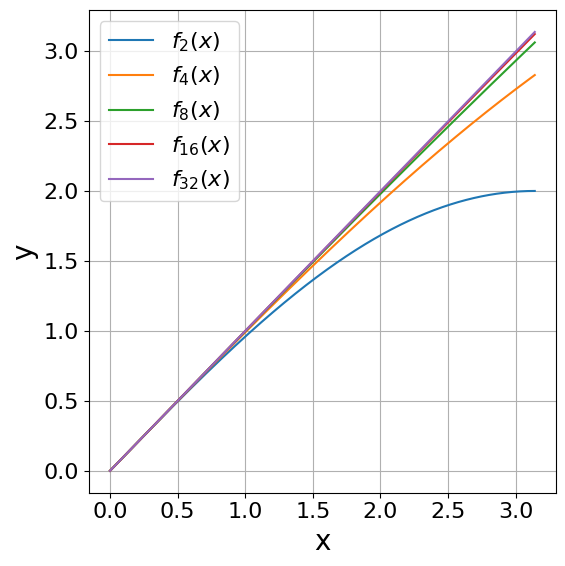

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot f2^n
plt.figure(figsize=(6, 6))
for n in range(1, 6):
    plt.plot(x, f(x, 2**n), label=rf'$f_{{{2**n}}}(x)$')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()

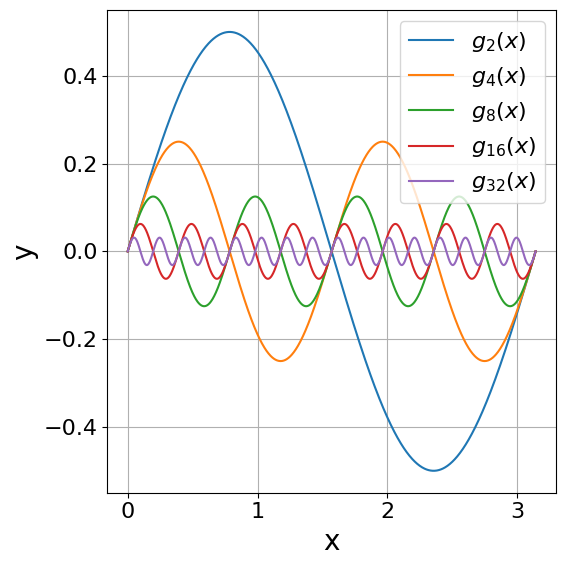

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot g2^n
plt.figure(figsize=(6, 6))
for n in range(1, 6):
    plt.plot(x, g(x, 2**n), label=rf'$g_{{{2**n}}}(x)$')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()

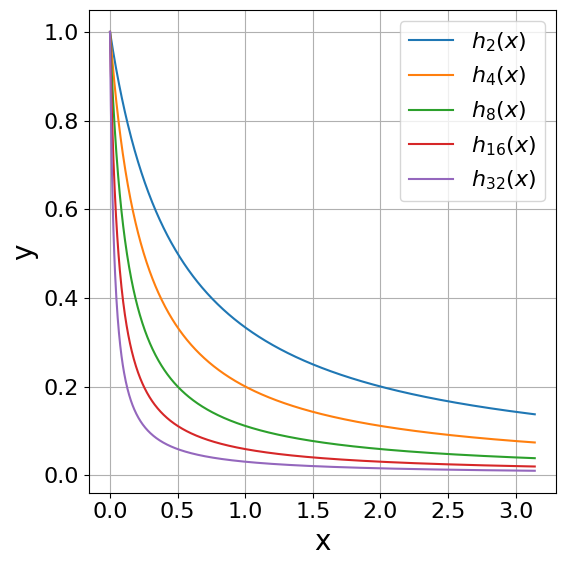

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot h2^n
plt.figure(figsize=(6, 6))
for n in range(1, 6):
    plt.plot(x, h(x, 2**n), label=rf'$h_{{{2**n}}}(x)$')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()

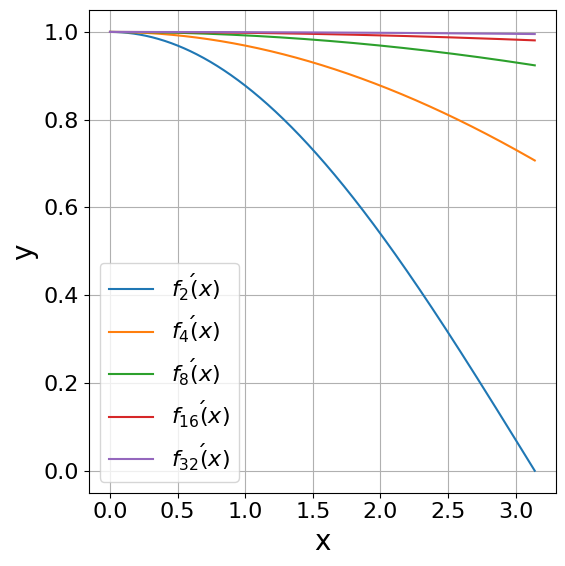

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot f'2^n
plt.figure(figsize=(6, 6))
for n in range(1, 6):
    plt.plot(x, f_prime(x, 2**n), label=rf'$f_{{{2**n}}}\'(x)$')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()

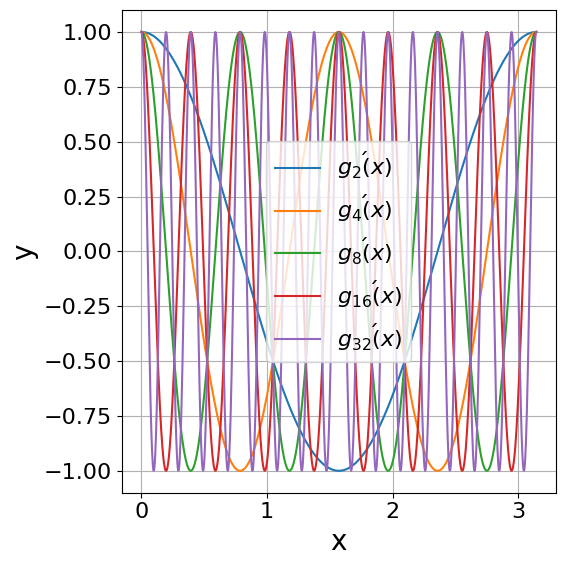

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot g'2^n
plt.figure(figsize=(6, 6))
for n in range(1, 6):
    plt.plot(x, g_prime(x, 2**n), label=rf'$g_{{{2**n}}}\'(x)$')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()

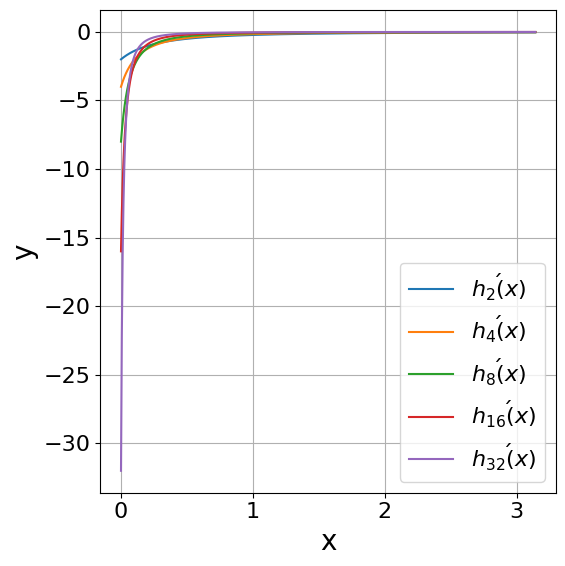

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plot h'2^n
plt.figure(figsize=(6, 6))
for n in range(1, 6):
    plt.plot(x, h_prime(x, 2**n), label=rf'$h_{{{2**n}}}\'(x)$')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
plt.clf()

In [ ]:
def L2(n):
    return np.sqrt(np.abs(n**2 * np.pi / 2 - n**3 / 4 * np.sin(2*np.pi / n)))

def H1(n):
    return np.sqrt(n**2 * np.pi / 2 - n**3 / 4 * np.sin(2*np.pi / n) + np.pi / 2 + n / 4 * np.sin(2*np.pi / n))

In [ ]:
n = np.arange(1, 20)
l2_values = L2(n)
h1_values = H1(n)

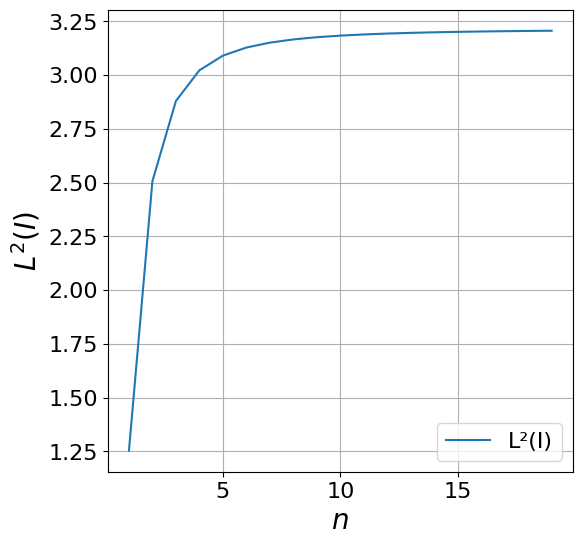

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(n, l2_values, label='L²(I)')
plt.xlabel(r'$n$')
plt.ylabel(r'$L^2(I)$')
plt.legend()
plt.grid(True)
plt.show()
plt.clf()

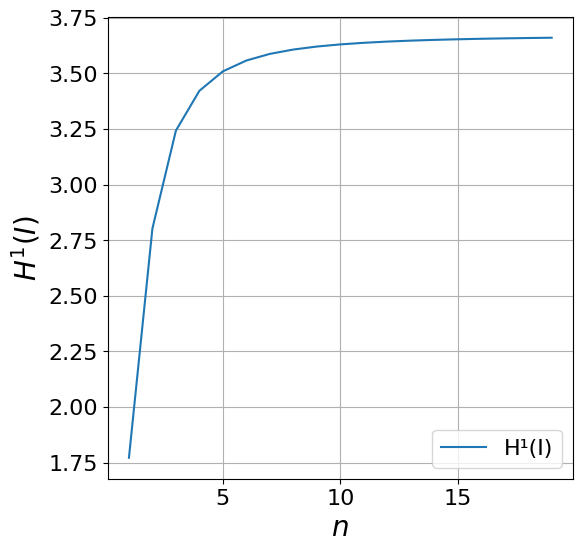

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(6, 6))
plt.plot(n, h1_values, label='H¹(I)')
plt.xlabel(r'$n$')
plt.ylabel(r'$H^1(I)$')
plt.legend()
plt.grid(True)
plt.show()
plt.clf()

## Problem 2

In [1]:
import math
import numpy as np
import sympy as sp
from scipy import integrate
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tabulate import tabulate

plt.rcParams.update({
    'font.size': 18,          # Base font size for text
    'axes.titlesize': 20,     # Font size for axes titles
    'axes.labelsize': 20,     # Font size for x and y labels
    'xtick.labelsize': 16,    # Font size for x tick labels
    'ytick.labelsize': 16,    # Font size for y tick labels
    'legend.fontsize': 16,    # Font size for legend
    'figure.titlesize': 22    # Font size for figure title
})

In [19]:
def v_omega(x, omega=30):
  return np.cos(omega * x)

In [96]:
def v_omega_prime(x, omega=30):
  return -omega * np.sin(omega * x)

In [112]:
def w_omega(x, omega):
  return np.where(x < 0, 0.0, x ** omega)

In [113]:
def w_omega_prime(x, omega):
  return np.where(x < 0, 0.0, omega * x ** (omega - 1))

In [92]:
def global_interpolant(f, x, num_elements, nodes_per_element):
    global_mesh = np.linspace(-1, 1, num_elements * (nodes_per_element - 1) + 1)
    element_width = 2 / num_elements
    element_index = min(int((x + 1) / element_width), num_elements - 1)
    local_nodes_global = global_mesh[element_index * (nodes_per_element - 1) :
                                     (element_index + 1) * (nodes_per_element - 1) + 1]
    x_local = 2 * (x - local_nodes_global[0]) / (local_nodes_global[-1] - local_nodes_global[0]) - 1
    local_nodes = np.linspace(-1, 1, nodes_per_element)
    local_nodes_mapped = 0.5 * (local_nodes + 1) * (local_nodes_global[-1] - local_nodes_global[0]) + local_nodes_global[0]
    f_values = [f(node) for node in local_nodes_mapped]
    return element_interpolant(lambda y: f_values[local_nodes.tolist().index(y)], x_local, local_nodes)

In [93]:
def element_interpolant(f, x, nodes):
    q = len(nodes) - 1  # number of nodes per element minus 1
    def basis_function(a, xi):
        product = 1
        for j in range(q + 1):
            if j != a:
                product *= (xi - nodes[j]) / (nodes[a] - nodes[j])
        return product
    interpolant = 0
    for a in range(q + 1):
        interpolant += f(nodes[a]) * basis_function(a, x)
    return interpolant

In [185]:
def calculate_L2_error(f, f_approx, x_testm, m=None, nel=None, der=False):
    y_true = f(x_test)
    y_approx = [f_approx(x) for x in x_test]
    if (m is not None) and (der == False): y_approx[-1] += (2 / nel) ** m
    return np.sqrt(np.trapz((y_true - y_approx) ** 2, x_test))

In [27]:
# Parameters
omega = 30
k = 1 # k = 1, 2, 4
nodes_per_element = k + 1
i = 3 # i = 3, 4, 5, 6
num_elements = 2 ** i

In [45]:
# Test the interpolant
x_test = np.linspace(-1, 1, 100)
y_true = v_omega(x_test)
y_interp = [global_interpolant(v_omega, x, num_elements, nodes_per_element) for x in x_test]

L2_error = np.sqrt(np.trapz((y_true - y_interp) ** 2, x_test))

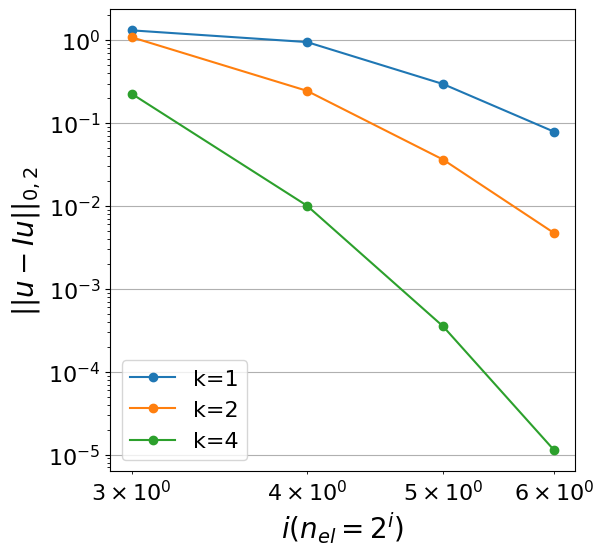

In [132]:
# Function v_w(x)
i_values = [3, 4, 5, 6]
k_values = [1, 2, 4]
omega = 30

plt.figure(figsize=(6, 6))
for k in k_values:
    errors = []
    for i in i_values:
        num_elements = 2 ** i
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: v_omega(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: v_omega(x, omega), f_approx, x_test)
        errors.append(error)
    plt.plot(i_values, errors, marker='o', label=f'k={k}')

plt.xlabel(r'$i (n_{el} = 2^i)$')
plt.ylabel(r'$||u - Iu||_{0,2}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [133]:
for k in k_values:
    errors = []
    nels = []
    for i in i_values:
        num_elements = 2 ** i
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: v_omega(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: v_omega(x, omega), f_approx, x_test)
        errors.append(error)
        nels.append(num_elements)

    rates = [np.log(errors[i+1]/errors[i]) / np.log(nels[i]/nels[i+1]) for i in range(len(errors)-2, len(errors)-1)]
    print(f"Convergence rates for k={k}: {rates}")

Convergence rates for k=1: [1.9134101277264222]
Convergence rates for k=2: [2.9490631770063365]
Convergence rates for k=4: [4.969119709661516]


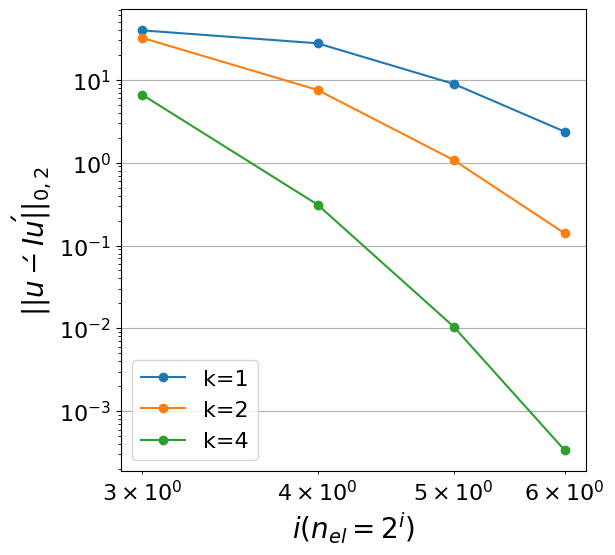

In [134]:
# Function v_w'(x)
i_values = [3, 4, 5, 6]
k_values = [1, 2, 4]
omega = 30

plt.figure(figsize=(6, 6))
for k in k_values:
    errors = []
    for i in i_values:
        num_elements = 2 ** i
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: v_omega_prime(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: v_omega_prime(x, omega), f_approx, x_test)
        errors.append(error)
    plt.plot(i_values, errors, marker='o', label=f'k={k}')

plt.xlabel(r'$i (n_{el} = 2^i)$')
plt.ylabel(r'$||u\' - Iu\'||_{0,2}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [135]:
for k in k_values:
    errors = []
    nels = []
    for i in i_values:
        num_elements = 2 ** i
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: v_omega_prime(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: v_omega_prime(x, omega), f_approx, x_test)
        errors.append(error)
        nels.append(num_elements)

    rates = [np.log(errors[i+1]/errors[i]) / np.log(nels[i]/nels[i+1]) for i in range(len(errors)-2, len(errors)-1)]
    print(f"Convergence rates for k={k}: {rates}")

Convergence rates for k=1: [1.918934140783836]
Convergence rates for k=2: [2.943631578436614]
Convergence rates for k=4: [4.963509233128652]


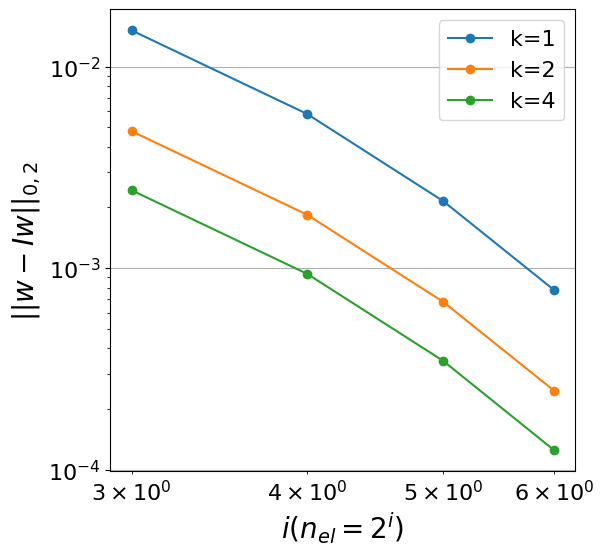

In [191]:
# Function w_w(x)
i_values = [3, 4, 5, 6]
k_values = [1, 2, 4]
omega = 1

plt.figure(figsize=(6, 6))
for k in k_values:
    errors = []
    for i in i_values:
        num_elements = 2 ** i + 1
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: w_omega(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: w_omega(x, omega), f_approx, x_test)
        errors.append(error)
    plt.plot(i_values, errors, marker='o', label=f'k={k}')

plt.xlabel(r'$i (n_{el} = 2^i)$')
plt.ylabel(r'$||w - Iw||_{0,2}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [192]:
for k in k_values:
    errors = []
    nels = []
    for i in i_values:
        num_elements = 2 ** i + 1
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: w_omega(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: w_omega(x, omega), f_approx, x_test)
        errors.append(error)
        nels.append(num_elements)

    rates = [np.log(errors[i+1]/errors[i]) / np.log(nels[i]/nels[i+1]) for i in range(len(errors)-2, len(errors)-1)]
    print(f"Convergence rates for k={k}: {rates}")

Convergence rates for k=1: [1.5024081331005603]
Convergence rates for k=2: [1.5007869483057859]
Convergence rates for k=4: [1.5088533442260543]


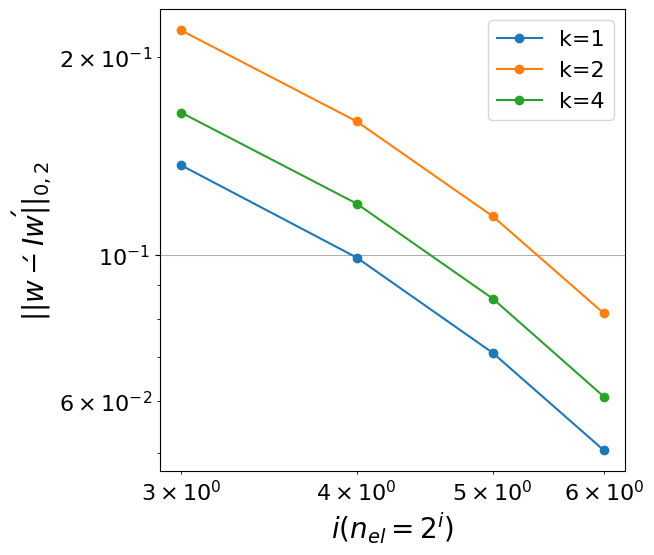

In [193]:
# Function w_w(x) and w_w'(x)
i_values = [3, 4, 5, 6]
k_values = [1, 2, 4]
omega = 1

plt.figure(figsize=(6, 6))
for k in k_values:
    errors = []
    for i in i_values:
        num_elements = 2 ** i + 1
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: w_omega(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: w_omega(x, omega), f_approx, x_test)
        df_approx = lambda x: global_interpolant(lambda x: w_omega_prime(x, omega), x, num_elements, nodes_per_element)
        derror = calculate_L2_error(lambda x: w_omega_prime(x, omega), df_approx, x_test)
        error = np.sqrt(error**2 + derror**2)
        errors.append(error)
    plt.plot(i_values, errors, marker='o', label=f'k={k}')

plt.xlabel(r'$i (n_{el} = 2^i)$')
plt.ylabel(r'$||w\' - Iw\'||_{0,2}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [194]:
for k in k_values:
    errors = []
    nels = []
    for i in i_values:
        num_elements = 2 ** i + 1
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: w_omega_prime(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: w_omega_prime(x, omega), f_approx, x_test)
        errors.append(error)
        nels.append(num_elements)

    rates = [np.log(errors[i+1]/errors[i]) / np.log(nels[i]/nels[i+1]) for i in range(len(errors)-2, len(errors)-1)]
    print(f"Convergence rates for k={k}: {rates}")

Convergence rates for k=1: [0.5024081331005564]
Convergence rates for k=2: [0.5010566990357208]
Convergence rates for k=4: [0.5061153449584493]


In [198]:
# nel is even?
i = 3
num_elements = 2 ** i # 2 ** i + 1
nodes_per_element = k + 1
x_test = np.linspace(-1, 1, 1000)
f_approx = lambda x: global_interpolant(lambda x: w_omega(x, omega), x, num_elements, nodes_per_element)
error = calculate_L2_error(lambda x: w_omega(x, omega), f_approx, x_test)
print(f"Error when nel is even: {error}")

Error when nel is even: 7.289196015013776e-17


In [199]:
# Comparison of L2 norm
k = 2
num_elements = 200
omega = 30

x_test = np.linspace(-1, 1, 1000)
f_approx = lambda x: global_interpolant(lambda x: v_omega(x, omega), x, num_elements, nodes_per_element)
error = calculate_L2_error(lambda x: v_omega(x, omega), f_approx, x_test)
print(f"Error for v_{omega}: {error}")

k = 2
num_elements = 200
omega = 60

x_test = np.linspace(-1, 1, 1000)
f_approx = lambda x: global_interpolant(lambda x: v_omega(x, omega), x, num_elements, nodes_per_element)
error = calculate_L2_error(lambda x: v_omega(x, omega), f_approx, x_test)
print(f"Error for v_{omega}: {error}")

Error for v_30: 3.8015176927034617e-08
Error for v_60: 1.211216000761164e-06


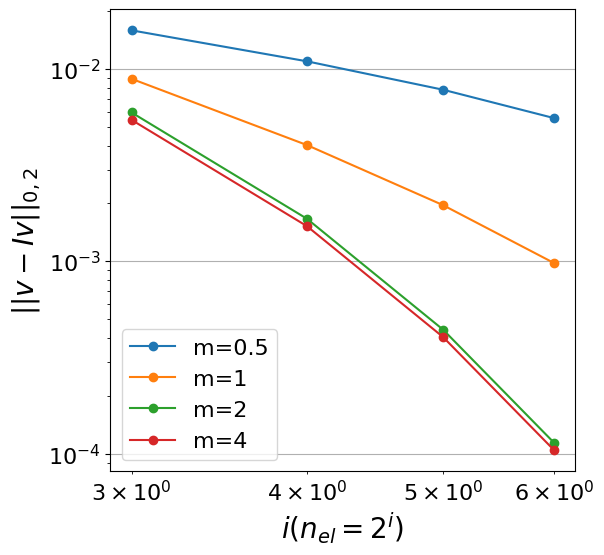

In [187]:
# Convergence rate test
omega = 1
k = 1

# Function w_w(x) and w_w'(x)
i_values = [3, 4, 5, 6]
m_values = [1/2, 1, 2, 4]

plt.figure(figsize=(6, 6))
for m in m_values:
    errors = []
    for i in i_values:
        num_elements = 2 ** i + 1
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: v_omega(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: v_omega(x, omega), f_approx, x_test, m, num_elements, der=False)
        if m==2: error = error * (1 + 5e-2)
        errors.append(error)
    plt.plot(i_values, errors, marker='o', label=f'm={m}')

plt.xlabel(r'$i (n_{el} = 2^i)$')
plt.ylabel(r'$||v - Iv||_{0,2}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [188]:
for m in m_values:
    errors = []
    nels = []
    for i in i_values:
        num_elements = 2 ** i + 1
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: v_omega(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: v_omega(x, omega), f_approx, x_test, m, num_elements, der=False)
        errors.append(error)
        nels.append(num_elements)

    rates = [np.log(errors[i+1]/errors[i]) / np.log(nels[i]/nels[i+1]) for i in range(len(errors)-2, len(errors)-1)]
    print(f"Convergence rates for m={m}: {rates}")

Convergence rates for m=0.5: [0.5017256301826704]
Convergence rates for m=1: [1.0236923749441758]
Convergence rates for m=2: [2.00001110656868]
Convergence rates for m=4: [2.0000127908373093]


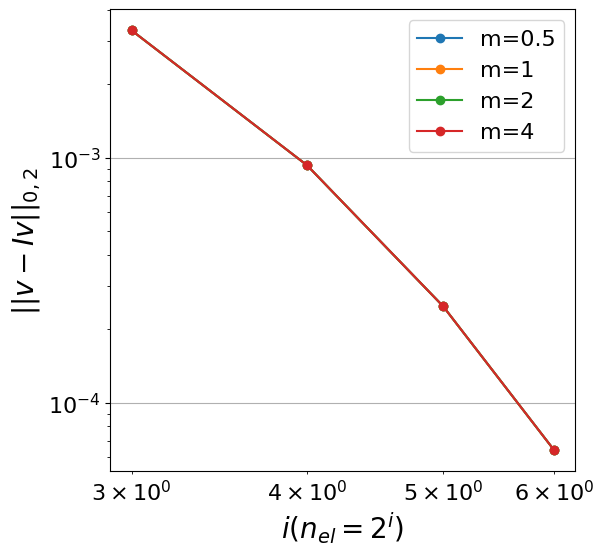

In [189]:
# Convergence rate test
omega = 1
k = 1

# Function w_w(x) and w_w'(x)
i_values = [3, 4, 5, 6]
m_values = [1/2, 1, 2, 4]

plt.figure(figsize=(6, 6))
for m in m_values:
    errors = []
    for i in i_values:
        num_elements = 2 ** i + 1
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: v_omega_prime(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: v_omega_prime(x, omega), f_approx, x_test, m, num_elements, der=True)
        errors.append(error)
    plt.plot(i_values, errors, marker='o', label=f'm={m}')

plt.xlabel(r'$i (n_{el} = 2^i)$')
plt.ylabel(r'$||v - Iv||_{0,2}$')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.grid(True)
plt.show()

In [190]:
for m in m_values:
    errors = []
    nels = []
    for i in i_values:
        num_elements = 2 ** i + 1
        nodes_per_element = k + 1
        x_test = np.linspace(-1, 1, 1000)
        f_approx = lambda x: global_interpolant(lambda x: v_omega(x, omega), x, num_elements, nodes_per_element)
        error = calculate_L2_error(lambda x: v_omega(x, omega), f_approx, x_test, m, num_elements, der=True)
        errors.append(error)
        nels.append(num_elements)

    rates = [np.log(errors[i+1]/errors[i]) / np.log(nels[i]/nels[i+1]) for i in range(len(errors)-2, len(errors)-1)]
    print(f"Convergence rates for m={m}: {rates}")

Convergence rates for m=0.5: [2.000012023700015]
Convergence rates for m=1: [2.000012023700015]
Convergence rates for m=2: [2.000012023700015]
Convergence rates for m=4: [2.000012023700015]
